<img width="70%" src="https://raw.githubusercontent.com/aaa121/Big-Data-Analytics/master/solution-edited.gif"/>

# Sales Analytics: Insights from Machine Learning Models
### by Akinwande Atanda (PhD, University of Canterbury, New Zealand)

### OBJECTIVES
This data analysis provide insights for understanding the customers and sales pattern of a wholesale distributor that operates in Auckland and Canterbury. The objectives are to identify the:
* unique classes of customers across market areas;
* optimal advertising option to increase revenue for a given level of sales target;
* best region to concentrate resources for securing new customers.

### DATA DESCRIPTION & SUMMARY
The dataset describes sales by 440 customers for each of the products distributed by the wholesaler as at the end of March 2017. The data consists of 8 attributes in multivariate form. There are 6 products (or features) and 2 labels variables described as follows:
* Customers monthly spending on the following classes of products: Fresh, Milk, Grocery, Frozen, Detergent and Beer
* Region: The market or region the customer is located. 1 for Auckland and 2 for Canterbury
* Channel: The advertising platform used for securing a specific client. Online = 1; Radio = 2; and Newspaper = 3

**Data: Load and Extract**
The data can be downloaded from a [GitHub](https://raw.githubusercontent.com/aaa121/Big-Data-Analytics/master/NzSalesByClientsRegion.csv) website indicated in the next line.

*Note: All the attributes in the dataset have been changed to protect clients and distributor confidentiality 

In [103]:
# import required libraries 
from contextlib2 import closing
from urllib import request
import numpy as np

url = "https://raw.githubusercontent.com/aaa121/Big-Data-Analytics/master/NzSalesByClientsRegion.csv"

with closing(request.urlopen(url)) as rf, open('salesNZ.csv', 'wb') as rd:
    rd.write(rf.read())
features = np.genfromtxt('salesNZ.csv', delimiter=',', skip_header=1, usecols=[2,3,4,5,6,7])
labelRegion = np.genfromtxt('salesNZ.csv', delimiter=',', skip_header=1, usecols=[0])
labelChannel = np.genfromtxt('salesNZ.csv', delimiter=',', skip_header=1, usecols=[1])
coltitle = np.genfromtxt('salesNZ.csv', delimiter=',', dtype=str, skip_header=0, usecols=[2,3,4,5,6,7])

print(coltitle) #Preview of sales by product

[['Fresh' 'Milk' 'Grocery' 'Frozen' 'Detergent' 'Beer']
 ['12669' '9656' '7561' '214' '2674' '1338']
 ['7057' '9810' '9568' '1762' '3293' '1776']
 ..., 
 ['14531' '15488' '30243' '437' '14841' '1867']
 ['10290' '1981' '2232' '1038' '168' '2125']
 ['2787' '1698' '2510' '65' '477' '52']]


**Average Sales by Product**

The average and total spending per clients for each distributed products are shown below by region.

In [104]:
products = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', 'Beer']

Auckland_Clients = np.count_nonzero(features[labelRegion==1,1])
Canterbury_Clients = np.count_nonzero(features[labelRegion==2,1])

Auckland_Sales_Product = np.zeros(6)
Canterbury_Sales_Product = np.zeros(6)

for i in range(0,6):
    Auckland_Sales_Product[i] = round(np.mean(features[labelRegion==1,i]),2)
    Canterbury_Sales_Product[i] = round(np.mean(features[labelRegion==2,i]),2)
    
print("Number of Clients in Auckland = ", Auckland_Clients)
print("Number of Clients in Canterbury = ", Canterbury_Clients)
print()
print("********************************************************************")
print("                                         ", products)
print("Average Sales by Product in Auckland = ", Auckland_Sales_Product)
print("Average Sales by Product in Canterbury = ", Canterbury_Sales_Product)
print()
print("********************************************************************")
print("                                         ", products)
print("Total Sales by Product in Auckland = ", Auckland_Sales_Product*Auckland_Clients)
print("Total Sales by Product in Canterbury = ", Canterbury_Sales_Product*Canterbury_Clients)

Number of Clients in Auckland =  298
Number of Clients in Canterbury =  142

********************************************************************
                                          ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', 'Beer']
Average Sales by Product in Auckland =  [ 13475.56   3451.72   3962.14   3748.25    790.56   1415.96]
Average Sales by Product in Canterbury =  [  8904.32  10716.5   16322.85   1652.61   7269.51   1753.44]

********************************************************************
                                          ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', 'Beer']
Total Sales by Product in Auckland =  [ 4015716.88  1028612.56  1180717.72  1116978.5    235586.88   421956.08]
Total Sales by Product in Canterbury =  [ 1264413.44  1521743.    2317844.7    234670.62  1032270.42   248988.48]


**Share of Average Sales by Product and Region**

The percentage share of regional average sales for each product distributed are shown in the figures below:

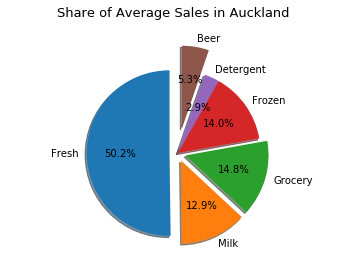

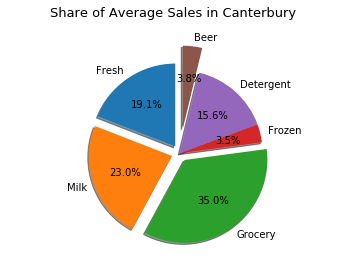

In [105]:
from matplotlib import pyplot as plt
products = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', 'Beer']
propSalesAUCK = []
propSalesCANT = []

for i in Auckland_Sales_Product:
    propSalesAUCK += [round(i/np.sum(Auckland_Sales_Product)*100,2)]
for i in Canterbury_Sales_Product:
    propSalesCANT += [round(i/np.sum(Canterbury_Sales_Product)*100,2)]
# print(products, propSalesAUCK, propSalesCANT)

explode = [0.1,0.1,0.1,0,0,0.3]
fig1, ax1 = plt.subplots()
ax1.pie(propSalesAUCK, explode=explode, labels=products, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
fig1.suptitle('Share of Average Sales in Auckland', fontsize=13)

fig2, ax2 = plt.subplots()
ax2.pie(propSalesCANT, explode=explode, labels=products, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
fig2.suptitle('Share of Average Sales in Canterbury', fontsize=13)

plt.show()

Comparatively, the pie charts indicate that Fresh and Grocery products account for the largest average sales in Auckland, while Milk and Grocery are the leading products driving average sales in Canterbury.

## CLASSIFICATION
Classification is a supervised machine learning task that allocates samples in a dataset to label classes. The models that implements this task is referred to as CLASSIFIERS. Prior developing, training and testing a classifier model, it is essential to visualise the distribution of two features based on known classes or labels using scatter plot. For the purpose of this analysis, we compare spending on Milk and Beer across region. The plot provide insight to understand unique characteristics that differentiate (if any) between clients in Auckland and Canterbury based on their spending pattern.

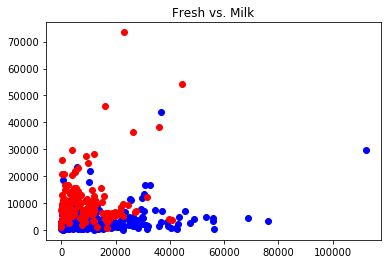

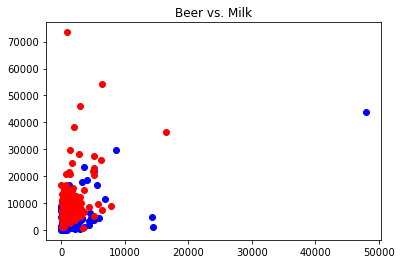

In [106]:
from matplotlib import pylab
pylab.plot(features[labelRegion==1,0], features[labelRegion==1,1], 'bo')
pylab.plot(features[labelRegion==2,0], features[labelRegion==2,1], 'ro')
pylab.title("Fresh vs. Milk")
pylab.show()

pylab.plot(features[labelRegion==1,5], features[labelRegion==1,1], 'bo')
pylab.plot(features[labelRegion==2,5], features[labelRegion==2,1], 'ro')
pylab.title("Beer vs. Milk")
pylab.show()


The scatter plots indicate slight differences between the clients in Auckland and Canterbury based on the monthly spending on Fresh, Milk and Beer products. The blue and red dots represent Auckland and Canterbury market respectively. A classifier model can be trained to identify potential market to increase sales given a customer monthly expected spending for each of the six products and proposed advertising channel or option.

For the classification task, the Gaussian Naive Bayes algorithm in Scikit-learn library is used to build a classifier to identify if the wholesaler should target either Auckland or Canterbuy market for increasing sales in subequent months.

In [107]:
from sklearn import model_selection, naive_bayes, metrics, svm
train, test, l_train, l_test = model_selection.train_test_split(features, 
                                                                labelRegion, 
                                                                test_size=0.3, 
                                                                random_state=23)#seed for random sampling

classifier = naive_bayes.GaussianNB()
# classifier = svm.SVC(kernel='linear', C=0.01) # Alternative Classification Algorithm (Support Vector Machine)
classifier.fit(train,l_train) # Training task
accuracy = classifier.score(test,l_test) #Testing task
print("Evaluation I: The predictive accuracy rate of the trained "
      "classifier is ",round(accuracy*100,1),"%") #Accuracy of the classifier
accuracy_simulated= model_selection.cross_val_score(classifier,features,labelRegion,cv=5)
print("Evaluation II: The accuracy rates based on random simulation "
      "split of the dataset are ", accuracy_simulated*100)
print("The average accuracy rate based on 5 iterations of the "
      "random split of dataset is ",round(np.mean(accuracy_simulated)*100,1),"%")

cfmat = metrics.confusion_matrix(l_test, classifier.predict(test))

Evaluation I: The predictive accuracy rate of the trained classifier is  91.7 %
Evaluation II: The accuracy rates based on random simulation split of the dataset are  [ 88.76  92.13  88.64  90.8   86.21]
The average accuracy rate based on 5 iterations of the random split of dataset is  89.3 %


Evaluation III: Confusion matrix, without normalization
[[87  4]
 [ 7 34]]


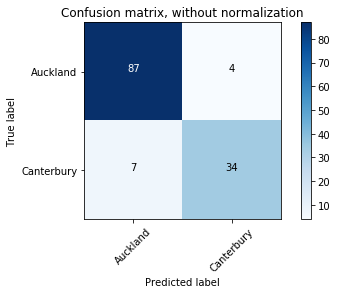

In [108]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Evaluation III: Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = cfmat
class_names = ["Auckland", "Canterbury"]
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

On the diagonal, the confusion matrix show the number of clients that are correctly classified to the appropriate market i.e. True positive. Using the test dataset, for instance, out of 91 clients in Auckland, 87 are correctly predicted, while 4 is error or fslse positive. To further evaluate the predictive power of the classifier model and support the outcomes of the first-two performance metrics -ranging from 89.3% to 91.7%-, tests of precision and sensitivity are shown as follows:

In [109]:
classReport = metrics.classification_report(l_test,classifier.predict(test),target_names=class_names)
print(classReport)

             precision    recall  f1-score   support

   Auckland       0.93      0.96      0.94        91
 Canterbury       0.89      0.83      0.86        41

avg / total       0.92      0.92      0.92       132



The classification report indicates:
* 92% precision rate i.e. the proportion of the predicted markets that are correct
* 92% recall or sensitivity or true positive rate. It expresses the share of clients' markets that are correctly identified. It includes both true and false positive classification.
* The harmonic mean of precision and recall rates is estimated as F1-score. It indicates the overall predictive power of the classification model using Gaussian Naive Bayes as a supervised machine learning algorithm
* Support is the number of clients in each market used for evaluating the trained classsification algorithm.
* Overall, the classifier is robust in predicting the optimal market.

For instance, the wholesaler plan to increase sales revenue for each of the products but need insights to determine  the region or market to invest more resources given the following spending targets:
* Row 1: Baseline projected sales for each products
* Row 2: The average industry growth in the last 12 months is 5.3%. Expected sales if baseline target increase by 5.3%
* Row 3: Least expected baseline sales if consumer spending slow down by 10% due to exchange rate depreciation of NZ$ to US$ and increase in wholesale price index.


In [110]:
April_targets = np.array([[39450,	10700,	50800,	150,	19500,	8800],
                          [41541,	11267,	53492,	158,	20534,	9266], 
                          [35505,	9630,	45720,	135,	17550,	7920]])

In [111]:
April_markets = classifier.predict(April_targets)
Optimal_market=[]
for i in April_markets:
    if i == 1:
        Optimal_market += ["Auckland"]
    else:
        Optimal_market += ["Canterbury"]
print (Optimal_market)

['Canterbury', 'Canterbury', 'Canterbury']


The classifier indicated that **Canterbury** is the optimal market for the month of April to increase sales revenue if industry maintain 5.3% or higher growth rate and the economy does not slow down more than 10% at the begining of 2nd quarter of 2017.

### CLUSTERING 
In the absence of labels (such as market location and advertising channels) to classify clients into definite groups, clustering as an unsupervising machine learning model becomes applicable. Samples or clients are grouped into different classes with similar features pattern. This type of machine learning task does not require training dataset or known label as input for training. One key importance of clustering is that it can provide insights for product development, market penetration, sales optimisation, and create opportunity for growth through the understanding of the unique features that distinguish each clients or customers or products or market etc. Out of the several clustering methods (both hierarchical and partitional types), the K-means clustering alogrithm is considered for this analysis. 

In [112]:
from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=2,init='random')
kmeans.fit(features)
c = kmeans.predict(features)
ck = np.zeros(len(c))
ck[c==0]=2
ck[c==1]=1

The fitted cluster model performance can be evaluated using completeness and homogeneity score as follows:

In [113]:
from sklearn import metrics
comp = metrics.completeness_score(labelRegion, ck)
homo = metrics.homogeneity_score(labelRegion, ck)
confm = metrics.confusion_matrix(labelRegion, ck)
print(comp,'\n',homo,'\n',confm)

0.0115922236631 
 0.00771846077478 
 [[ 51 247]
 [ 14 128]]


**If the completeness score approaches 1, it indicates that MOST of the predicted classes correspond to the actual classes. On the otherhand, if the homogeneity score is close to 1, it indicates that all the classes contain ALMOST only elements that are member of a particular class.**

In this case, the unsupervised machine learning model is found underfitting the data to classify the clients into appropriate region. This might be due to the small sample size and unclear identifiable features between the clients in Auckland and Canterbury (as graphically shown below). Therefore, the sales distribution dataset is best fitted using supervised machine learning models to optimise revenue for the company. 

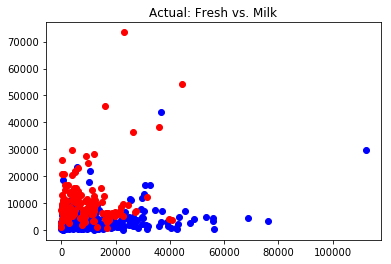

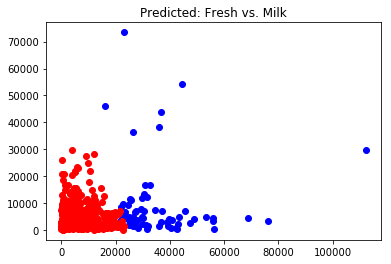

In [114]:
from matplotlib import pylab
pylab.plot(features[labelRegion==1,0], features[labelRegion==1,1], 'bo')
pylab.plot(features[labelRegion==2,0], features[labelRegion==2,1], 'ro')
pylab.title("Actual: Fresh vs. Milk")
pylab.show()

pylab.plot(features[ck==1,0], features[ck==1,1], 'bo')
pylab.plot(features[ck==2,0], features[ck==2,1], 'ro')
pylab.title("Predicted: Fresh vs. Milk")
pylab.show()

**It is likewise possible to classify the products purchased by the clients into different advertising channels. This is expected to provide insights on sales driven by a specific advert. K-Means unsupervised machine learning model is used for this purpose under 3 different classification iterations. The products classified are Fresh, Milk and Beer products distributed by the wholesaler.**

The completeness score for  k_means_advert_3  =  0.00352386272737
The homogeneity score for  k_means_advert_3  =  0.00335107801555
The completeness score for  k_means_advert_8  =  0.00830447097888
The homogeneity score for  k_means_advert_8  =  0.0160930402144
The completeness score for  k_means_advert_bad_init  =  0.00352386272737
The homogeneity score for  k_means_advert_bad_init  =  0.00335107801555


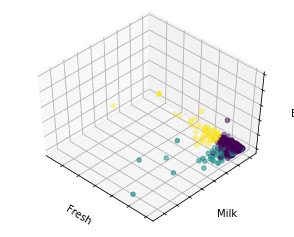

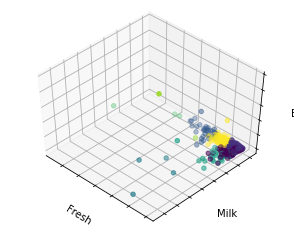

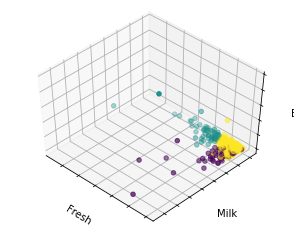

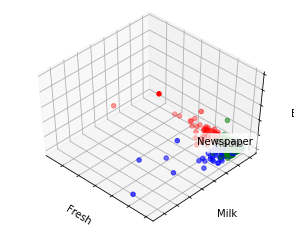

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)

X = features
y = labelChannel

estimators = {'k_means_advert_3': KMeans(n_clusters=3),
              'k_means_advert_8': KMeans(n_clusters=8),
              'k_means_advert_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    
    print('The completeness score for ', name, ' = ', metrics.completeness_score(y,  est.predict(X)))
    print('The homogeneity score for ', name, ' = ', metrics.homogeneity_score(y,  est.predict(X)))
    
    labels = est.labels_

    ax.scatter(X[:, 0], X[:, 1], X[:, 5], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Fresh')
    ax.set_ylabel('Milk')
    ax.set_zlabel('Beer')
    fignum = fignum + 1

# Plot the last choosen classifier
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Online', 1),
                    ('Radio', 2),
                    ('Newspaper', 3)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 5].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
colors = ['b', 'r', 'g']
ax.scatter(X[:,0],X[:,1],X[:,5],c=np.choose(labels, colors))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Fresh')
ax.set_ylabel('Milk')
ax.set_zlabel('Beer')
plt.show()

Results from the classification model indicate that there is clear differences on how each of the advertising channels drive sales. But, the last 3D plot clearly shows that wholesale distribution of Beer in New Zealand can be best promoted using Radio ('red dots') and Newspaper ('green dots'), while online is more effective for promoting Fresh and Milk products but not as efficient as other channels in terms of conversion rate. On the this basis, the wholesaler should use less of online advertising tools to target potential clients and adjust the marketing strategies to focus on the use of Radio and Newspaper campaigns

### COMPLEMENTARY PRODUCTS DEMAND ANALYSIS
To understand the degree of association in the demand for the distributed products, the Pearson product-momemnt correlation coefficient is used. It explains how strongly pairs of the distributed products are related. The degree of association is determined between the range of -1 to 1. Coefficient close to -1 or 1 indicate strong negative or positive relationship respectively. Otherwise, it is a moderate relationship if it is within the range of '+-0.5 and 0.7. Any correlation estimate outside those ranges signal weak relationship.

For this analysis, the pair-wise correlations among the distributed products ('Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', and 'Beer') is estimated as follows:

In [117]:
products = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', 'Beer']
corr = np.corrcoef(features.T)
print(products, '\n',corr)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent', 'Beer'] 
 [[ 1.    0.1  -0.01  0.35 -0.1   0.24]
 [ 0.1   1.    0.73  0.12  0.66  0.41]
 [-0.01  0.73  1.   -0.04  0.92  0.21]
 [ 0.35  0.12 -0.04  1.   -0.13  0.39]
 [-0.1   0.66  0.92 -0.13  1.    0.07]
 [ 0.24  0.41  0.21  0.39  0.07  1.  ]]


The correlation matrix indicates very strong relationship between the following pairs of products:
* Milk and Grocery
* Grocery and Detergent

This provides insight that those products have complementary demand and the distributor can reduce advertising cost on one without affecting the demand for others. 
However, Beer is the only product that has the weakest relationship among the other distributed products. This type of product requires a differrent advertising and marketing strategy and campaign in order to enhance sales and achieve  the company's revenue target for sub-sequent months.

The corrlation matrix can be visualised using a pseudocolour plot as shown below:

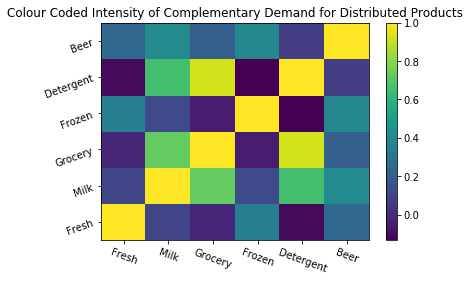

In [120]:
pylab.pcolor(corr)
pylab.colorbar()
pylab.xticks(np.arange(0.5,6.5),['Fresh', 'Milk', 'Grocery', 'Frozen','Detergent','Beer'],rotation=-20)
pylab.yticks(np.arange(0.5,6.5),['Fresh', 'Milk', 'Grocery', 'Frozen','Detergent','Beer'],rotation=20)
pylab.title("Colour Coded Intensity of Complementary Demand for Distributed Products")
pylab.show()